# <ins>**Project 3: The Traveling Salesman Problem Using Ant Colony Optimization (ACO)**

### Chase Moffat
### George Martinez
### Siobahn Devlin
### CAP 4630 Intro to AI
### Dr. Oge Marques


# **Introduction**


#### The quest to efficiently solve computational problems that are categorized as NP-Hard has been a longstanding challenge in the field of computer science and operations research. Among these, the Traveling Salesman Problem (TSP) serves as a benchmark for evaluating the performance of heuristic and metaheuristic algorithms. The TSP seeks to find the shortest possible route that visits a set of cities exactly once and returns to the origin city, epitomizing the intricacies of combinatorial optimization problems.

<br>

#### This project report outlines the development, implementation, and analysis of an Ant Colony Optimization (ACO) algorithm, a nature-inspired metaheuristic approach, tailored to solve instances of the TSP. The ACO algorithm draws inspiration from the foraging behavior of ants and their ability to find shortest paths between food sources and their colony. By simulating this behavior in a computational environment, the algorithm effectively harnesses positive feedback, probabilistic solution construction, and distributed computing to arrive at high-quality solutions for the TSP.

<br>

#### Our implementation delves into the intricate mechanisms of the ACO, including the representation of cities and distances, encoding of the solution space, initial ant population generation, pheromone trail updating, and computation strategies for the best solution. We also discuss the design choices, parameter settings, and the rationale behind the selection of the stopping condition for the algorithm.

<br>

#### The effectiveness and robustness of the ACO algorithm are evaluated through a series of experiments that investigate the impact of various parameters and design decisions on the solution quality and convergence characteristics. This document serves not only as a report on the current implementation but also as a reflective analysis on the nuances of designing a metaheuristic algorithm for a complex optimization problem like the TSP.

<br>

#### In the following sections, we will thoroughly detail the implementation of the algorithm, outline the methods used in our experiments, and share the outcomes. Additionally, we will discuss the significance of the results and provide insights based on our observations.

# **Project Roles and Contributions**

**Architect (Chase Moffat)**:

**Role**: Chase was primarily responsible for the architectural design of the solution, ensuring a solid foundation for the project.

**Contributions**:
- Developed the foundational architecture of the software, creating a robust and scalable framework for the TSP solution.
- Worked closely with Siobahn to define the structure and interrelationships of classes, ensuring a cohesive and well-organized system.
- Played a pivotal role in revising and optimizing the class architecture inherited from Project 2 to better suit the current project's requirements.
- Provided oversight on the integration of reused components, such as ‘recreateGraph’, to ensure seamless functionality within the new architecture.
- Assisted in outlining the standards and protocols for coding practices to maintain code quality and consistency throughout development.

<br>

**Developer (Siobahn Devlin)**:

**Role**: Siobahn took on the role of the primary developer, responsible for coding the majority of the project and conducting experiments.

**Contributions**:
- Led the coding efforts, translating the project architecture into functional code with a focus on the ACO algorithm and its components.
- Spearheaded the implementation of core features, such as the ‘City’ and ‘PheromoneMatrix’ classes, ensuring alignment with the architectural vision.
- Integrated and adapted reused code from Project 2, particularly the experiment support code, enhancing its features to meet new project specifications.
- Conducted a series of experiments to fine-tune the algorithm, utilizing experimental code from previous works to establish a best route distance and percentage difference table.
- Collaborated with Chase to refine the class design, ensuring the code was efficient, modular, and maintainable.

<br>

**Reporter (George Martinez)**:

**Role**: George was tasked with project documentation and report writing, ensuring clear and comprehensive communication of the project's goals and outcomes.

**Contributions**:
- Responsible for documenting the project, George synthesized complex technical details into a comprehensive final report.
- Utilized the layout from Project 2 as a template, updating and expanding it to accurately reflect the current project’s scope and results.
- Integrated findings from Siobahn’s experimental code into the report, presenting the best route distances and percentage differences in an accessible format.
- Crafted detailed documentation on the project's architecture and development process, capturing the rationale behind design choices and their impacts.


# **Project Overview**

####This project tackles the well-known Traveling Salesman Problem (TSP) using a bio-inspired algorithm known as Ant Colony Optimization (ACO). In the TSP, we aim to find the shortest route that connects a set of cities without visiting any twice. We've programmed an ACO in Python that tries to solve this by mimicking how real ants find efficient paths between their nest and food sources. This report outlines our approach, explaining how we set up the ACO, managed the ant population, and continuously improved their search paths through virtual pheromone trails. Our experiments test different settings within the ACO to see which ones lead to the best results.

# **Design Decisions**

1. **Class-Based Design**: We chose to use a class-based approach to encapsulate the behavior and data associated with cities, pheromones, probability calculations, ants, and the ACO algorithm itself. This provides a modular and organized structure of our code.

 - **Rationale**: Object-oriented programming (OOP) principles were applied to encapsulate data and methods, ensuring high cohesion and low coupling, which enhances maintainability and readability.

 - **Impact**: This approach makes it easier to manage complex interactions within the ACO algorithm, such as those between ants and pheromones.

 - **Trade-offs**: OOP can introduce additional complexity and overhead in terms of understanding the interrelationships between classes.

2. **City Representation**: Each city is represented by a ‘City’ class instance with x and y coordinates, which provides a straightforward way to manage city locations and calculate distances.

 - **Rationale**: Using a ‘City’ class simplifies the process of handling cities and allows for additional attributes or methods to be added in the future, such as city names or specialized distance functions.

 - **Impact**: A clear and extensible representation of cities aids in the scalability of the algorithm to accommodate different TSP variants.

 - **Trade-offs**: The overhead of class instances for a large number of cities can be higher in terms of memory compared to simple data structures like tuples or dictionaries.

3. **Distance Calculation**: We opted for Euclidean distance (straight line) between cities, which is a common choice for TSP problems where movement between any two points is unrestricted.

 - **Rationale**: Euclidean distance is computationally simple and intuitive for representing the cost between cities in the TSP.

 - **Impact**: It facilitates a quick calculation of the cost function, which is crucial for algorithms that require numerous distance calculations.

 - **Trade-offs**: Euclidean distance does not consider real-world travel constraints like road networks, which might be a consideration for more realistic applications.

4. **Pheromone Matrix**: The pheromone levels between cities are stored in a ‘PheromoneMatrix’ class, which abstracts the management of pheromone values, including initialization, reading, and updating.

 - **Rationale**: Centralizing pheromone management in one class streamlines the processes of updating and retrieving pheromone levels.

 - **Impact**: This can lead to more efficient data access patterns and localized updates during the algorithm's execution.

 - **Trade-offs**: As the number of cities grows, the pheromone matrix may become large and consume significant memory.

5. **Probability Calculation**: A separate ‘ProbabilityCalculator’ class is used to handle the computation of transition probabilities, which adheres to the principle of single responsibility and makes our code easier to maintain.

 - **Rationale**: Isolating probability calculations ensures that changes to the probability logic are contained and do not affect other parts of the system.

 - **Impact**: It promotes a clearer understanding of the stochastic processes involved in the ACO and allows for easier optimization and debugging of these processes.

 - **Trade-offs**: This may create a dependency on other classes (like ‘City’ and ‘PheromoneMatrix’), which requires careful design to manage.

6. **Parameterization**: Key parameters of the ACO algorithm like the number of ants (‘ant_count’), the influence of pheromone levels (‘alpha’), the influence of city distance (‘beta’), the evaporation rate of pheromones (‘evaporation_rate’), and the pheromone deposit factor (‘pheromone_deposit_factor’) are parameterized in the ACO class. This allows for easy adjustments and fine-tuning of the algorithm.

 - **Rationale**: Exposing parameters allows users and/or the TA to tweak the ACO behavior to suit different problem instances or to optimize performance.

 - **Impact**: High configurability can lead to a more robust and adaptable algorithm that can be fine-tuned for better results.

 - **Trade-offs**: With more parameters, the complexity of understanding and correctly setting them increases, potentially requiring more expertise or experimentation.

7. **Ant Behavior**: We created an ‘Ant’ class to simulate each ant's path through the cities. Each ant builds its own tour and updates the pheromones accordingly.

 - **Rationale**: Mimicking the behavior of real ants allows the algorithm to naturally explore and exploit solution spaces.

 - **Impact**: The decentralized nature of ant decisions contributes to the algorithm's ability to avoid local optima and find global solutions.

 - **Trade-offs**: The simulation of individual ants can be computationally intensive, especially for a large number of ants or cities.

8. **Route Initialization**: The initial routes are generated randomly, providing a diverse starting point for the optimization process.

 - **Rationale**: Random initialization ensures a diverse set of starting solutions, which helps in exploring the solution space more thoroughly.

 - **Impact**: It can prevent the algorithm from immediately converging to a suboptimal solution.

 - **Trade-offs**: Randomness can sometimes lead to poor initial solutions, which may require more iterations to improve.

9. **Evaporation and Deposit**: Pheromone evaporation and deposit are implemented following each ant's tour completion to simulate the natural behavior of pheromones. This helps in avoiding premature convergence to suboptimal solutions.

 - **Rationale**: These processes help balance exploration and exploitation by diminishing the influence of older paths and reinforcing more successful ones.

 - **Impact**: This dynamic adjustment helps the algorithm to adapt over time and avoid stagnation.

 - **Trade-offs**: Incorrectly tuning the evaporation and deposit rates can lead to either too rapid convergence or excessive exploration, both of which can be detrimental to finding the optimal solution.

10. **Graphical Representation**: The use of matplotlib to visualize the cities and the path taken by the best solution helps in understanding the output of the algorithm and provides a visual verification of the algorithm’s performance.

 - **Rationale**: Visual feedback is invaluable for debugging, understanding the algorithm’s performance, and presenting results.

 - **Impact**: It can greatly enhance the user's ability to interpret the results and verify the algorithm's effectiveness.

 - **Trade-offs**: Generating graphs adds computational overhead and is not necessary for the algorithm’s operation, which may be a consideration for time-sensitive applications.

11. **City List Generation**: We added a function to generate a list of cities with random coordinates, which is useful for testing the algorithm without the need to manually input city locations.

 - **Rationale**: Providing a means to generate cities allows for quick and repeatable tests without manual setup.

 - **Impact**: It aids in benchmarking the algorithm's performance across different scenarios and problem sizes.

- **Trade-offs**: Random city generation may not always produce representative test cases for real-world applications.

12. **Main Routine**: In the ‘__main__’ section, we instantiated the ACO algorithm, ran it, and displayed the initial and final routes, demonstrating the end-to-end workflow of our solution.

 - **Rationale**: Having a clear entry point and workflow in the main routine makes the code executable and testable.

 - **Impact**: It provides a template for how the ACO algorithm should be used and makes it accessible for new users or for integration into larger systems.

 - **Trade-offs**: The main routine might need to be adapted for different use cases or when integrating into other applications.


In essence, the design choices revolve around balancing the flexibility, maintainability, and scalability of the code with the potential for higher computational and memory costs, and the need for more nuanced parameter tuning. This balance is struck to cater to both the complexity of the TSP and the practical constraints of computational resources and user interaction.


# **Implementation Details**

**How were the cities and distances represented (as a data structure)?**

- **Cities**: In our implementation, each city is represented by an instance of the ‘City’ class, which encapsulates the (x, y) coordinates of the city on a 2D plane. The ‘City’ objects are stored in a list which serves as the primary data structure for holding all cities.

- **Distances**: The distances between cities are not stored in a permanent data structure; instead, they are calculated on the fly using the ‘calculateDistance’ method in the ‘City’ class. This method computes the Euclidean distance between two ‘City’ objects.

<br>

**How did you encode the solution space?**

- The solution space is implicitly defined through the ‘travel’ method of the ‘Ant’ class. Each ant constructs a path by visiting cities based on probabilistic transitions that depend on pheromone concentration and distance, which encode the solution.

<br>

**How did you handle the creation of the initial ant population?**

- The initial ant population is created within the ‘run’ method of the ‘ACO’ class. A new list of ‘Ant’ objects is created for each iteration, with each ant starting at a random city and constructing its path through the ‘travel’ method.

<br>

**How did you handle the updating of the pheromone trails?**

- Pheromone updating is done in the ‘run’ method of the ‘ACO’ class as well. After each ant has constructed its path, the code updates the pheromone levels on each edge (city1, city2) in the path by first reducing the existing pheromone level (evaporation) and then adding new pheromone based on the quality of the solution (pheromone deposit). The pheromone level is stored and updated in the ‘PheromoneMatrix’ class.

<br>

**Which strategy(ies) did you use to compute the best solution?**

- The best solution is identified by keeping track of the shortest path found across all iterations and all ants. If an ant finds a path that is shorter than the current shortest path, the best solution is updated. This is a form of an elitist strategy, where only the best solution found so far is retained.


<br>

**Which stopping condition did you use? Why?**

- The stopping condition used in our implementation is a fixed number of iterations, specified as a parameter to the ‘run’ method of the ‘ACO’ class. We chose this stopping criterion because it is simple and guarantees that the algorithm will terminate after a predefined computational effort.

<br>

**What other parameters, design choices, initialization and configuration steps are relevant to your design and implementation?**

<br>
Several parameters and design choices we used:

- **Alpha and Beta**: These parameters determine the relative importance of pheromone (alpha) and heuristic distance (beta) information in directing the ants.

- **Evaporation Rate**: This determines how quickly pheromone trails decay over time.

- **Pheromone Deposit Factor**: This affects how much pheromone is deposited on the paths taken by the ants.

- **Ant Count**: The number of ants used in each iteration.

- **Initialization**: The pheromone matrix is initialized with a uniform value (default of 1), which can impact the early exploration behavior of the ants.

<br>

We decided to use a mixture of these parameters from this github link by Yefferson A. Marín Cantero (Marí­n) to gain inspiration on how to implement the ACO.

<br>

**Which (simple) experiments have you run to observe the impact of different design decisions and parameter values? Post their results and your comments.**

<br>

**Experiment 1**

In this experiment we are holding all values constant except for ant_count. Due to computational runtime limitations and the amount of time it takes to run each experiment, we are testing 10, 20, and 30 ants. With a sample size of 20, we are running the experiment 20 times and averaging out the results to see what ant_count is most effective.

<br>
For this experiment, we have found that 30 ants is most effective with an average percent difference of 27.12%. 30 ants will be used in the next experiment to continue to find the most effective parameters for the algorithm.

**Impact of Number of Ants on Best Route Distance**: The best route distance shows a trend of decreasing with an increase in the number of ants. This means that with more ants, the algorithm is likely finding better routes on average.

<br>

**Impact on Initial Route Distance**: The initial route distance seems to increase with an increase in the number of ants. This suggests that when more ants are used, the starting solutions might be less optimal, perhaps because the larger number of ants explore a more varied initial set of paths.

<br>

**Impact on Percent Difference**: The percentage difference between the best route and the initial route increases as the number of ants increases. This means that as more ants are used, the improvement of the algorithm compared to the initial state increases, suggesting that with more ants, the algorithm converges to a better solution from a potentially less optimal starting point.

<br>

**Optimal Number of Ants**: Based on the data, using 30 ants provides the highest improvement from the initial route to the best route, despite starting from a less optimal position. However, the best route distance with 20 ants is slightly better than with 30 ants. This means there's a trade-off to consider between improvement and the absolute best route obtained.

<br>

**Design Decisions and Parameter Values**: While the number of ants is a critical parameter in the Ant Colony Optimization algorithm, the data suggests that simply increasing the number of ants doesn't always lead to the absolute best solutions. However, it can lead to significant improvements from the initial state.

In conclusion, it's evident that the number of ants can significantly influence the algorithm's performance. To achieve the best results, it's crucial to experiment with various parameters and not just focus on maximizing one metric.

<br>

**Experiment 2**:
<br>

For this experiment, we only changed the evaporation_rate and tested three different values: 0.25, 0.50, and 0.75. An evaporation_rate of 0.75 produced the greatest percent difference at 29.02%. This value will be used for our third experiment to continue refining the parameters for the ACO.

<br>

**Variation Across Evaporation Rates**: The data suggests a positive correlation between evaporation rate and average percent difference. This means as the evaporation rate increases, the optimization process of the Ant Colony Optimization (ACO) algorithm becomes more effective.

<br>

**Performance Improvements**: The highest average percent difference was achieved at an evaporation rate of 0.75, indicating this rate's potential to maximize the solution's quality. A higher percent difference means the algorithm found a much shorter path compared to the initial path, signifying better performance.

<br>

**Consistency in Results**: While the best performance was observed with an evaporation rate of 0.75, even at the lowest rate of 0.25, the results are commendable, with an average percent difference of 22.91%. This shows that the ACO algorithm is resilient and can provide good results across a range of parameter values.

<br>

**Optimal Evaporation Rate**: The evaporation rate plays a significant role in the pheromone updating process. An evaporation rate of 0.75 seems to strike the right balance, allowing older, less optimal paths to fade while reinforcing newer, more efficient paths.

<br>

**Future Experiments**: Given the consistent improvement in performance with increasing evaporation rates, it might be beneficial to test even higher rates (closer to 1) in future experiments to see if there's a plateau or if the improvements continue.

<br>

**Significance of Evaporation in ACO**: This experiment underlines the importance of the evaporation rate in the ACO. It acts as a memory reset mechanism, ensuring that the algorithm doesn't get overly biased by early findings and remains adaptive to discover even better solutions.

<br>

In summary, this experiment offers valuable insights into the behavior of the ACO algorithm under different evaporation rates. It highlights the significance of fine-tuning parameters to achieve optimal results. An evaporation rate of 0.75 appears to be the most promising for the given dataset and problem, but there's potential for further exploration.

<br>

**Experiment 3**:
<br>
Finally, this experiment examines the effects of the Pheromone Deposit Factor on the percent different. The resutls were close in this experiment and warrants further runs. However, here the optimal pheromone_deposit_factor is 0.75.
 <br>

**Tight Spread of Results**: Across the three tables, the average percent differences are relatively close, ranging from 25.7% to 28.57%. This indicates that the Pheromone Deposit Factor's influence on the results is less pronounced than one might expect.

<br>

**Optimal Pheromone Deposit Factor**: The second table shows the highest average percent difference of 28.57%. This suggests that a Pheromone Deposit Factor of 0.75 might be the most optimal among the tested values.

<br>

**Consistency in Performance**: The results across all runs in each table show relatively consistent performance. While there are outliers, the majority of the runs have percent differences within a 10-15% range of each table's average.

<br>

**Variation in Best Route Distance**: While the percent difference provides a clear metric for evaluation, there's also significant variance in the Best Route Distance across the tables. This underlines the influence of the Pheromone Deposit Factor on the routes discovered by the Ant Colony Optimization (ACO) algorithm.

<br>

**Further Exploration**: Given the close range of average percent differences across the tables, it might be beneficial to conduct additional runs or even explore values between the tested Pheromone Deposit Factors to pinpoint the optimal value more accurately.

<br>

**Significance of Pheromone Deposit in ACO**: Pheromone deposit plays a crucial role in guiding ants in the ACO algorithm. The right balance ensures that efficient routes are quickly discovered and reinforced. However, as seen from the results, extreme values don't necessarily lead to vastly different outcomes, emphasizing the resilience and adaptability of the ACO algorithm.

<br>

In summary, this Pheromone Deposit Factor experiment offers insights into the nuanced impact of this parameter on the ACO's performance. While there is a clear optimal value among the tested ranges, the close spread of results suggests that ACO's behavior is robust across different Pheromone Deposit Factor values. Further experiments might provide more clarity on the optimal settings.


# **The Code**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class City:

  """
    Initialize a City with given x and y coordinates.

    Parameters:
      - x : X coordinate of the city.
      - y : Y coordinate of the city.
  """
  def __init__(self, x, y):
    self.x = x
    self.y = y

  """
    Calculates the straight line distance between cities.

    Parameters:
      - next_city : The next city to calculate the distance to.

    Returns:
      - The distance between two cities.
  """

  def calculateDistance(self, next_city):
      return np.sqrt((self.x - next_city.x)**2 + (self.y - next_city.y)**2)


  """
      Sets the pheromone level to a given neighboring city.

      Parameters:
        - next_city : The next city for which to set the pheromone.
        - pheromone : The pheromone value to set.
  """

  def __repr__(self):
      return "(" + str(self.x) + "," + str(self.y) + ")"

In [ ]:
class PheromoneMatrix:

    """
      Initialize the pheromone matrix for all city pairs.

      Parameters:
          - cities : List of cities.
          - initial_value : Initial pheromone value. Defaults is 1.
    """

    def __init__(self, cities, initial_value=1):

        self.matrix = {}
        for city1 in cities:

            for city2 in cities:

                if city1 != city2:
                    self.matrix[(city1, city2)] = initial_value

    """
      Get the pheromone value for a city pair.

      Parameters:
          - city1 : The first city.
          - city2 : The second city.

      Returns:
            - The pheromone value for the city pair.
    """
    def get_pheromone(self, city1, city2):

        return self.matrix.get((city1, city2), 1)

    """
      Set the pheromone value for a city pair.

      Args:
          - city1 : The first city.
          - city2 : The second city.
          - value : The pheromone value to be set.
        """

    def set_pheromone(self, city1, city2, value):

        self.matrix[(city1, city2)] = value

In [ ]:
class ProbabilityCalculator:

    """
      Initialize the probability calculator with parameters.

      Args:
          - alpha : Influence of pheromone on direction.
          - beta : Influence of distance on direction.
          - pheromone_matrix : The pheromone matrix.
    """

    def __init__(self, alpha, beta, pheromone_matrix):
        self.alpha = alpha
        self.beta = beta
        self.pheromone_matrix = pheromone_matrix

    """
      Calculate the next city selection probabilities based on pheromone values and distance.

      Args:
          - current_city : The current city.
          - cities : List of cities.

      Returns:
          - list: The probabilities for moving to each city in the list.
    """

    def calculate_probabilities(self, current_city, cities):
        probabilities = []
        denominator = self._calculate_denominator(current_city, cities)

        for city in cities:
            numerator = self._calculate_numerator(current_city, city)
            probability = numerator / denominator
            probabilities.append(probability)

        return probabilities

    """
      Calculate the numerator of the probability formula.

      Args:
        - current_city : The current city.
        - next_city : The next city.

      Returns:
        - The calculated numerator value based on pheromone levels and distance.
    """

    def _calculate_numerator(self, current_city, next_city):
        return (self.pheromone_matrix.get_pheromone(current_city, next_city) ** self.alpha) * \
               ((1.0 / current_city.calculateDistance(next_city)) ** self.beta)

    """
      Calculate the denominator of the probability formula for the ant's movement.



      Args:
        - current_city : The city where the ant is currently located.
        - cities : The list of cities to which the ant can potentially move.

      Returns:
            - The calculated denominator value, which is the sum of the numerators for all considered cities.
    """
    def _calculate_denominator(self, current_city, cities):
      sum = sum([self._calculate_numerator(current_city, city) for city in cities])

      while sum == 0:
        sum = sum([self._calculate_numerator(current_city, city) for city in cities])

      return sum

In [ ]:
def createRoute(cityList):
    """
    Create an initial random route from a list of cities.

    Parameters:
      - cityList : List of City objects representing the cities.

    Returns:
      - A randomized list of cities.
    """
    route = random.sample(cityList, len(cityList))

    return route

def initialPopulation(populationSize, cityList):
    """
    Generate an initial population of routes.

    Parameters:
      - populationSize : The number of routes to generate.
      - cityList : List of City objects representing the cities.

    Returns:
      - A list of generated routes.
    """
    population = []
    for i in range(0, populationSize):

        population.append(createRoute(cityList))

    return population

In [ ]:
class Ant:

    def __init__(self, cities):
        self.cities = cities
        self.path = []
        self.current_city = random.choice(cities)
        self.path.append(self.current_city)

    def travel(self, prob_calculator):
        remaining_cities = [city for city in self.cities if city not in self.path]

        while remaining_cities:

            probabilities = prob_calculator.calculate_probabilities(self.current_city, remaining_cities)
            next_city = np.random.choice(remaining_cities, p=probabilities)
            self.path.append(next_city)
            self.current_city = next_city
            remaining_cities.remove(next_city)

        return self.path

In [ ]:
# Used for our calculations in the experiments below
def calculatePercentDifference(value1, value2):
  if value1 == value2:
    return 0
  try:
      return round((abs(value1 - value2) / ((value1 + value2) / 2)) * 100.0, 2)
  except ZeroDivisionError:
        return float('inf')

class ACO:
    def __init__(self, cities, iterations=100, ant_count=10, alpha=1, beta=5, evaporation_rate=0.5, pheromone_deposit_factor=1.0, showData=True):
        self.cities = cities
        self.iterations = iterations
        self.ant_count = ant_count
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_deposit_factor = pheromone_deposit_factor
        self.pheromone_matrix = PheromoneMatrix(self.cities)
        self.prob_calculator = ProbabilityCalculator(self.alpha, self.beta, self.pheromone_matrix)

    def run(self, showData):
        first_iteration = True
        original_route_length = 0
        shortest_path = None
        shortest_path_length = float('inf')

        for iteration in range(self.iterations):
            ants = [Ant(self.cities) for _ in range(self.ant_count)]

            for ant in ants:
                ant_path = ant.travel(self.prob_calculator)
                ant_path_length = sum([ant_path[i].calculateDistance(ant_path[i+1]) for i in range(len(ant_path)-1)])

                if first_iteration:
                  original_route_length = ant_path_length
                  first_iteration = False

                if ant_path_length < shortest_path_length:
                    shortest_path_length = ant_path_length
                    shortest_path = ant_path

                for i in range(len(ant_path) - 1):

                    pheromone_value = self.pheromone_matrix.get_pheromone(ant_path[i], ant_path[i+1])
                    new_pheromone_value = (1 - self.evaporation_rate) * pheromone_value + self.pheromone_deposit_factor / ant_path_length
                    self.pheromone_matrix.set_pheromone(ant_path[i], ant_path[i+1], new_pheromone_value)

        percent_difference = calculatePercentDifference(original_route_length, shortest_path_length)

        if showData == True:
          print("Initial distance: ", str(original_route_length))
          print("Final distance: " + str(shortest_path_length))
          print("Percent Difference: " + str(percent_difference) + "%")

        return shortest_path, shortest_path_length, original_route_length, percent_difference

In [ ]:

def createGraph(cityList, route, title, lineColor):
    """
    Creates a visualization of the cities and the route.

    Parameters:
      - cityList : List of City objects representing cities.
      - route : A list representing the order of cities in the route.
      - title : Title for the graph.
      - lineColor : Color for the route line on the graph.

    This function uses matplotlib to create a graphical representation of the cities and the route.
    """
    x_values = []  # Store x-coordinates of cities in the route
    y_values = []  # Store y-coordinates of cities in the route

    # Used for connecting the first and last city together
    x_for_first_and_last_city = []
    y_for_first_and_last_city = []

    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

    # Use an offset for the text labels (adjust as needed)
    label_offset = 1         # Increased offset for city coordinates
    start_label_offset = 2   # Offset for 'Start' label
    end_label_offset = 0.5   # Offset for 'End' label

    # Plot individual cities
    for city in cityList:
        plt.plot(city.x, city.y, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")

    # Populate x_values and y_values from the route
    for city in route:
        x_values.append(city.x)
        y_values.append(city.y)

    # Populate the arrays for the first and last city
    x_for_first_and_last_city.append(x_values[0])
    x_for_first_and_last_city.append(x_values[-1])
    y_for_first_and_last_city.append(y_values[0])
    y_for_first_and_last_city.append(y_values[-1])

    # Annotate each city with its coordinates
    for i, j in zip(x_values, y_values):
        plt.text(i, j+label_offset, '({}, {})'.format(i, j))

    # Connect cities in the route
    plt.plot(x_values, y_values, color=lineColor)

    # Connect the first city to the last city
    plt.plot(x_for_first_and_last_city, y_for_first_and_last_city, color=lineColor)

    # Add labels for 'Start' and 'End'
    plt.text(x_values[0], y_values[0] + start_label_offset, 'Start', fontsize=8, ha='center', va='bottom')
    plt.text(x_values[-1], y_values[-1] - end_label_offset, 'End', fontsize=8, ha='center', va='top')

    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title(title)
    plt.grid(True)  # Optionally, add gridlines for clarity
    plt.show()


def createCities(num):
    """
    Create a list of random cities.

    Returns:
      - A list of City objects.
    """
    cityList = []
    for i in range(0, num):
        newCity = City(x=int(random.random() * 200), y=int(random.random() * 200))
        cityList.append(newCity)
    return cityList

Initial distance:  1072.776839393048
Final distance: 864.6287096680902
Percent Difference: 21.49%
Initial Route: [(41,54), (138,197), (170,81), (47,139), (15,19), (24,97), (124,65), (18,99), (132,133), (166,43), (94,111), (175,180), (112,172), (51,188), (97,144), (108,35), (35,87), (122,79), (66,53), (166,2), (114,142), (32,197), (57,16), (75,143), (181,55)]
Initial distance: 2616.358287738202


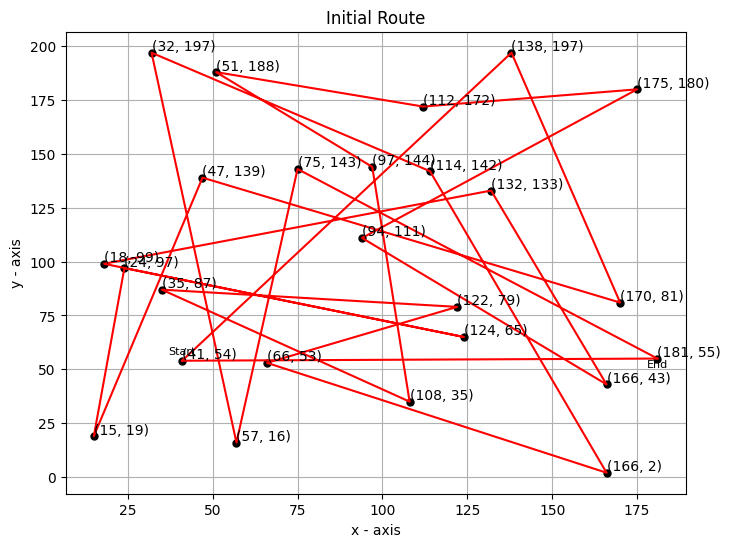

Best route:  [(57,16), (15,19), (41,54), (66,53), (35,87), (24,97), (18,99), (47,139), (75,143), (97,144), (114,142), (132,133), (94,111), (122,79), (124,65), (108,35), (166,2), (166,43), (181,55), (170,81), (175,180), (138,197), (112,172), (51,188), (32,197)]
Best distance:  864.6287096680902
Percent improvement:  21.49


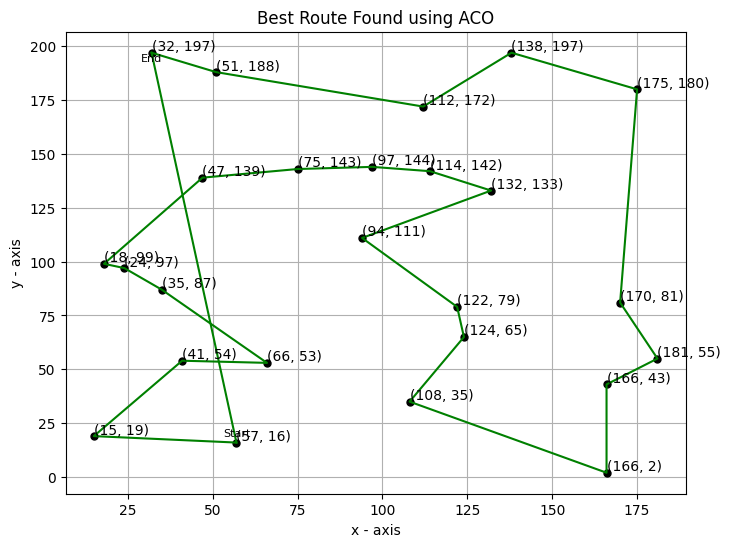

In [ ]:
if __name__ == "__main__":

  city_list = createCities(25)
  aco = ACO(city_list)
  #shortest_path, shortest_path_length, original_route_length, percent_difference
  best_route, best_distance, initial_route_distance, percent_difference = aco.run(showData=True)

  initial_distance = sum([city_list[i].calculateDistance(city_list[i+1]) for i in range(len(city_list)-1)])
  print("Initial Route:", city_list)
  print("Initial distance:", initial_distance)
  createGraph(city_list, city_list, title="Initial Route", lineColor="red")

  print("Best route: ", best_route)
  print("Best distance: ", best_distance)
  print("Percent improvement: ", percent_difference)
  createGraph(city_list, best_route, title="Best Route Found using ACO", lineColor="green")

##Experiment Support Code

In [ ]:
# Note to the TA: Siobahn reused her code (and modified it to make it work with this code, but it's mostly the same) from Project 2 for the experiments
def calculateAverageChange(averagesList):
  sum = 0
  for average in list:
    sum += average

  return sum / len(averagesList)

def calculateAverage(data):
  sum = 0
  for i in data:
    sum += i[2]

  return round(sum / len(data), 2)

def createResultsTable(resultsData):
  cleaned_data = tuple(t[-3:] for t in resultsData)
  rows = []

  for i in range(len(cleaned_data)):
    rows.append("Run " + str(i + 1))
  rows.append("Average")

  columns = ['Best Route Distance', 'Initial Route Distance', "Percent Difference (%)"]

  fig, ax = plt.subplots(figsize=(10, 3))

  ax.axis('off')

  table_data = [list(t) for t in cleaned_data]

  # Add Averages Row
  average_row = ["N/A", "N/A", str(calculateAverage(cleaned_data))]
  table_data.append(average_row)

  ax.table(cellText=table_data, colLabels=columns, rowLabels=rows, loc='center')

  plt.show()

def createResultsBarChart(resultsData):
  # We're passing in the same results data from before, but here we only need the percentDifference data
    x_values = []
    y_values = []

    cleaned_data = tuple(t[-3:] for t in resultsData)

    for i in range(0, len(cleaned_data)):
      x_values.append(str(i + 1))

    for result in cleaned_data:
      y_values.append(result[2])

    fig = plt.figure(figsize = (10, 5))

    plt.bar(x_values, y_values, color ='blue', width = 0.4)

    plt.xlabel('Run')
    plt.ylabel('Percent Difference')
    plt.title('Percent Differences Compared From Trials')

    plt.show()

#     def __init__(self, cities, ant_count=10, alpha=1, beta=5, evaporation_rate=0.5, pheromone_deposit_factor=1.0):
def runExperiment(sampleSize, cities, iterations, ant_count, alpha, beta, evaporation_rate, pheromone_deposit_factor, showGraph, showData):

  # an array of tuples (initialRoute, bestRoute, and percentDifference) to compare
  results = []
  for i in range(sampleSize):
    if (showData == True):
      print("Run " + str(i + 1))

    city_list = createCities(cities)
    aco = ACO(city_list, iterations, ant_count, alpha, beta, evaporation_rate, pheromone_deposit_factor)
    results.append(aco.run(showData))

    if (showData == True):
      print("\n")

  createResultsTable(resultsData=results)
  print("\n")
  createResultsBarChart(resultsData=results)

# **Experiments**

## Experiment 1: Number of Ants

## Results
### In this experiment we are holding all values constant except for ant_count. Due to computational runtime limitations and the amount of time it takes to run each experiment, we are testing 10, 20, and 30 ants. With a sample size of 20, we are running the experiment 20 times and averaging out the results to see what ant_count is most effective.

### For this experiment, we have found that 30 ants is most effective with an average percent difference of 27.12%. 30 ants will be used in the next experiement to continue to find the most effective parameters for the algorithm.

10 Ants


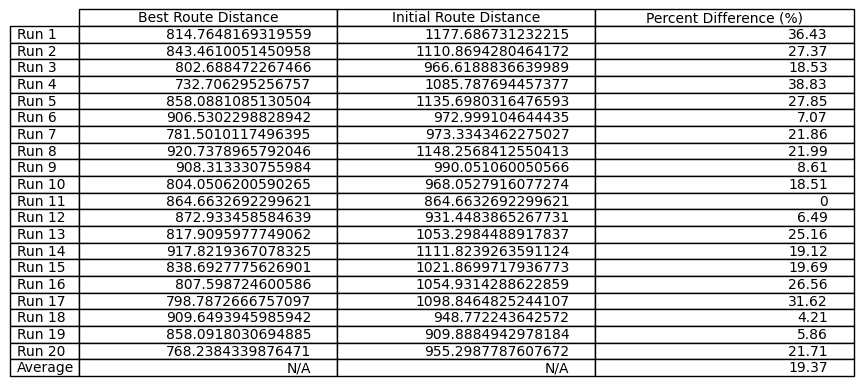

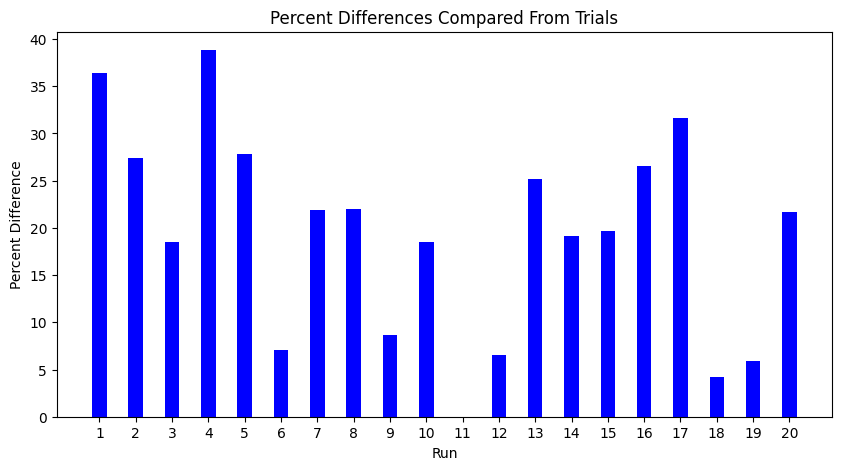



20 Ants


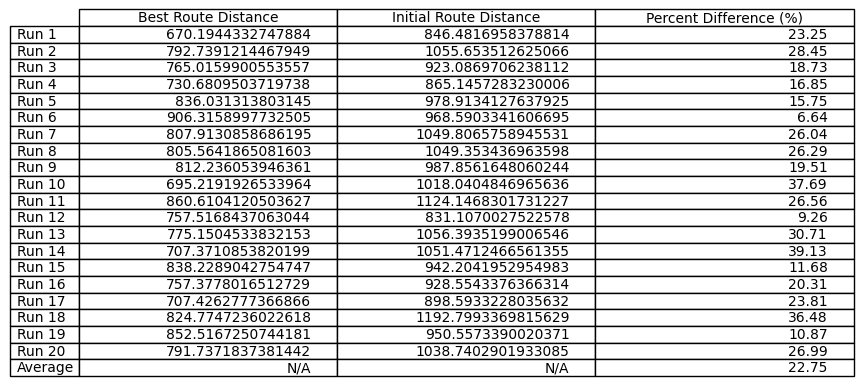

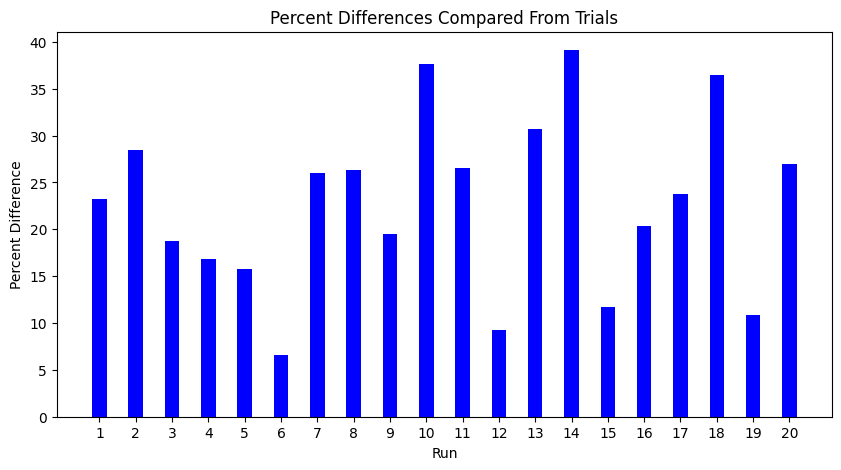



30 Ants


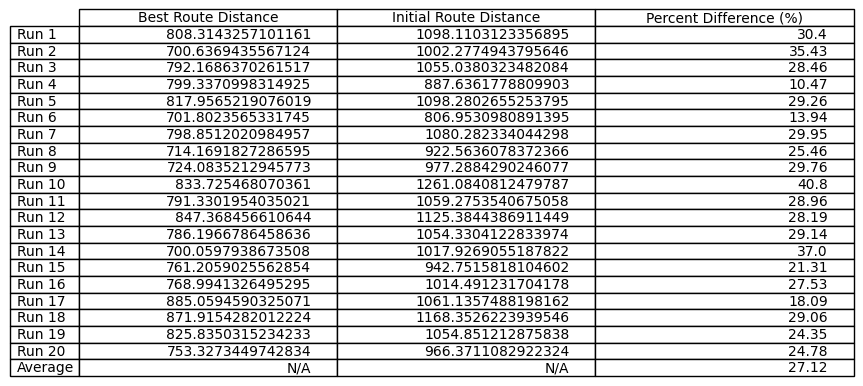

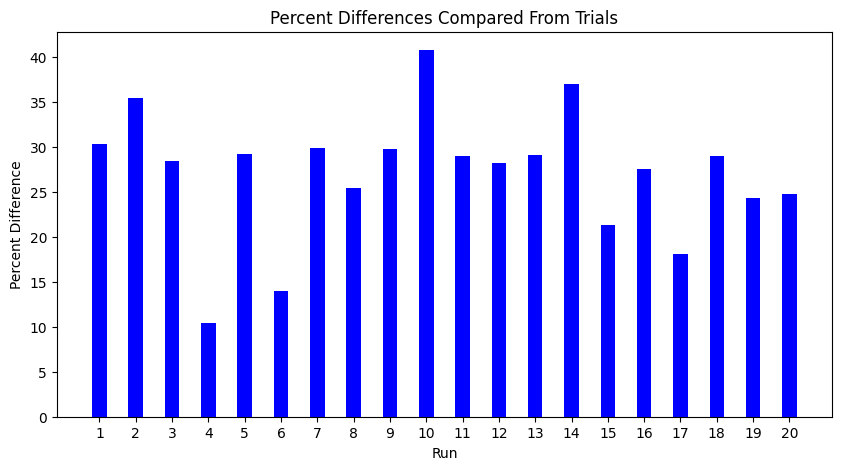

In [ ]:
print("10 Ants")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=10, alpha=1, beta=5, evaporation_rate=0.5, pheromone_deposit_factor=1.0, showGraph=True, showData=False)

print("\n")

print("20 Ants")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=20, alpha=1, beta=5, evaporation_rate=0.5, pheromone_deposit_factor=1.0, showGraph=True, showData=False)

print("\n")

print("30 Ants")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=30, alpha=1, beta=5, evaporation_rate=0.5, pheromone_deposit_factor=1.0, showGraph=True, showData=False)

## Experiment 2: Evaporation Rate

## Results
### For this experiment, we only changed the evaporation_rate and tested three different values: 0.25, 0.50, and 0.75. An evaporation_rate of 0.75 produced the greatest percent difference at 29.02%. This value will be used for our third experiment to continue refining the parameters for the ACO.

Evaporation Rate: 0.25


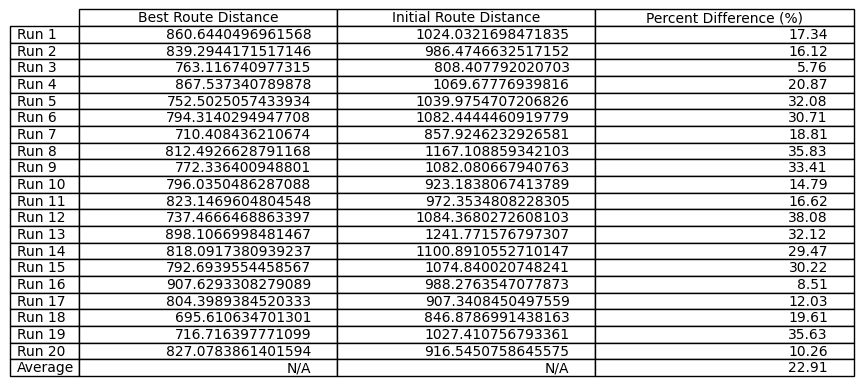

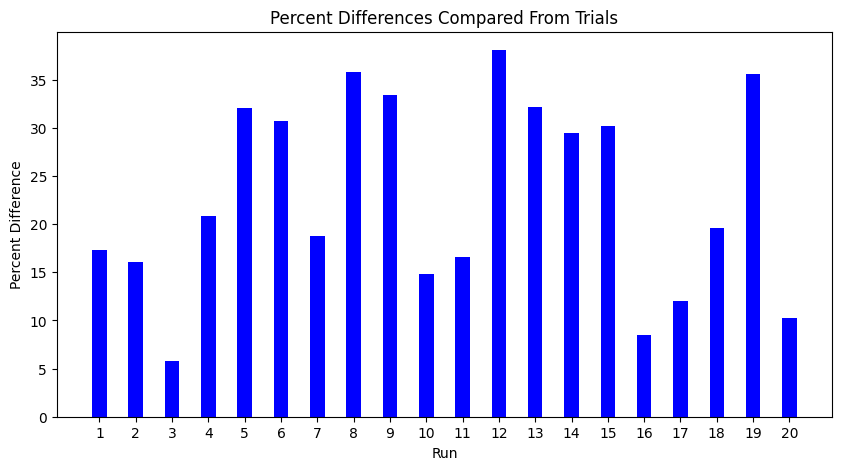



Evaporation Rate: 0.50


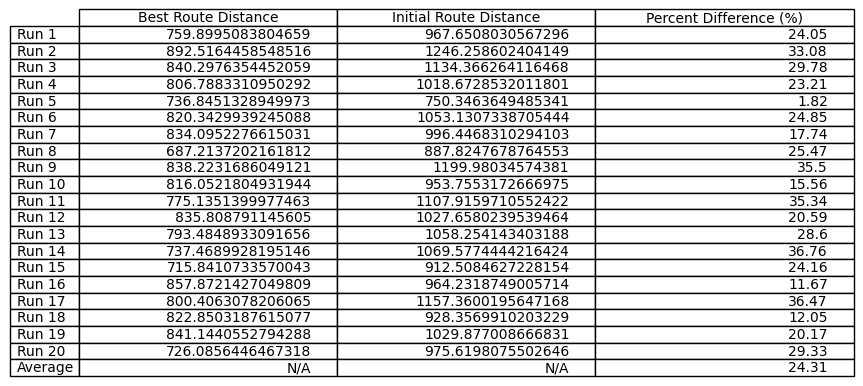

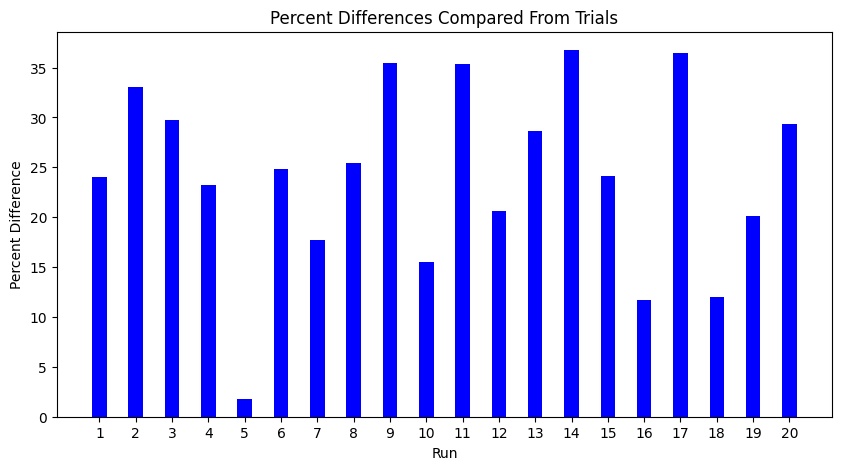



Evaporation Rate: 0.75


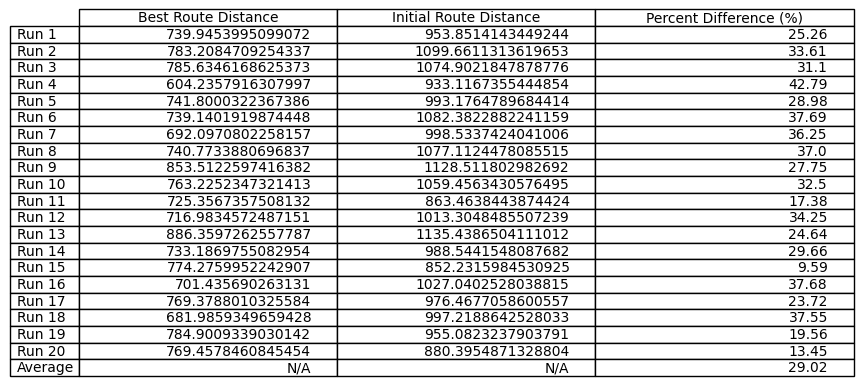

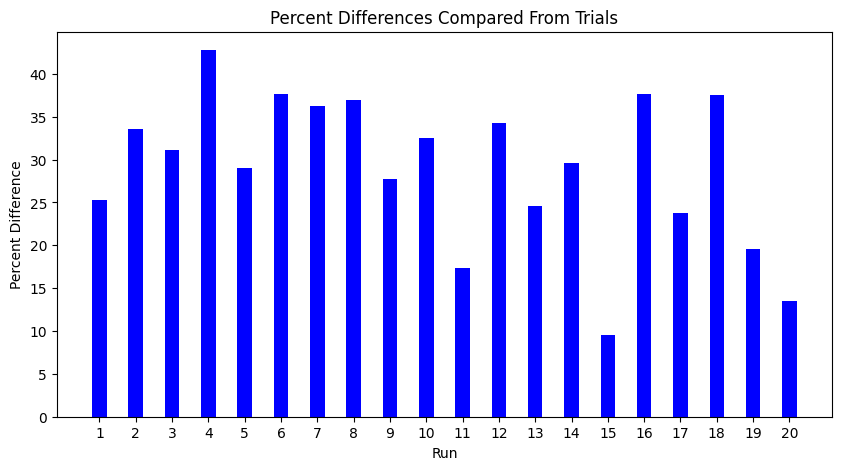

In [ ]:
print("Evaporation Rate: 0.25")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=30, alpha=1, beta=5, evaporation_rate=0.25, pheromone_deposit_factor=1.0, showGraph=True, showData=False)

print("\n")

print("Evaporation Rate: 0.50")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=30, alpha=1, beta=5, evaporation_rate=0.50, pheromone_deposit_factor=1.0, showGraph=True, showData=False)

print("\n")

print("Evaporation Rate: 0.75")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=30, alpha=1, beta=5, evaporation_rate=0.75, pheromone_deposit_factor=1.0, showGraph=True, showData=False)

## Experiment 3: Pheromone Deposit Factor

## Results
### Finally, this experiment examines the effects of the Pheromone Deposit Factor on the percent different. The resutls were close in this experiment and warrants further runs. However, here the optimal pheromone_deposit_factor is 0.75.



Pheromone Deposit Factor: 0.50


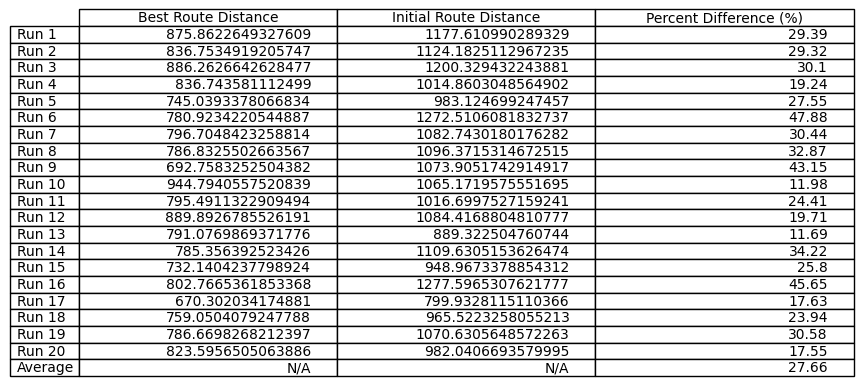

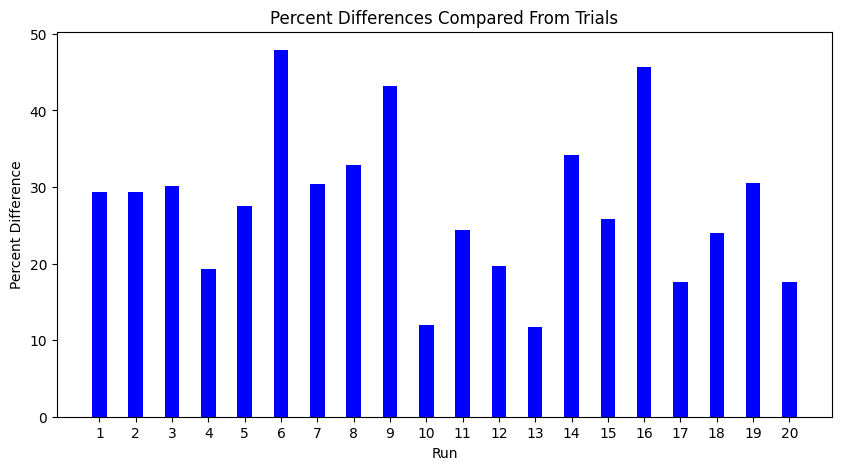



Pheromone Deposit Factor: 0.75


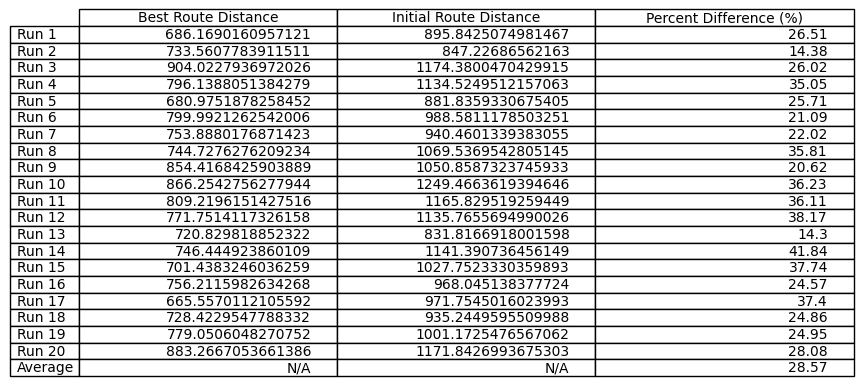

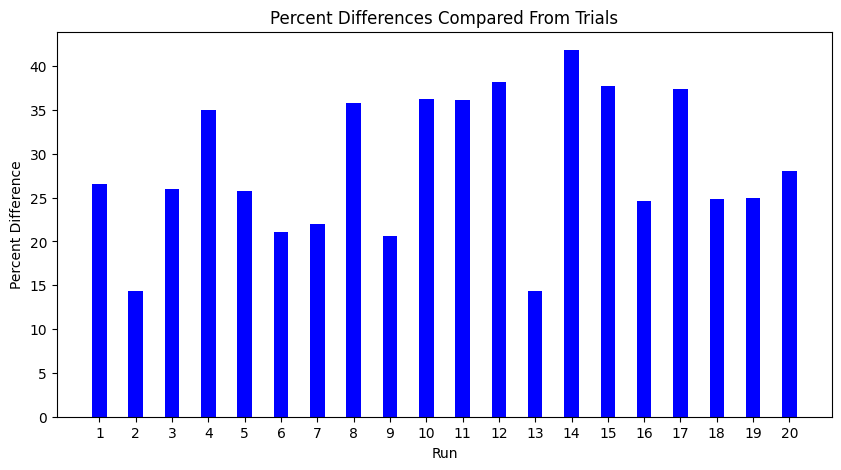



Pheromone Deposit Factor: 1.0


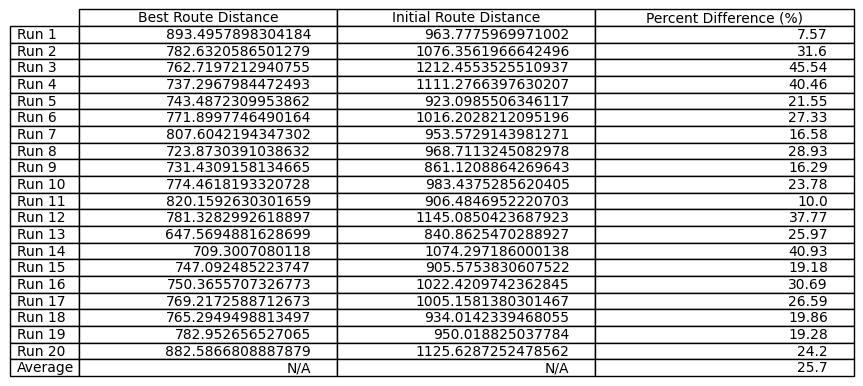

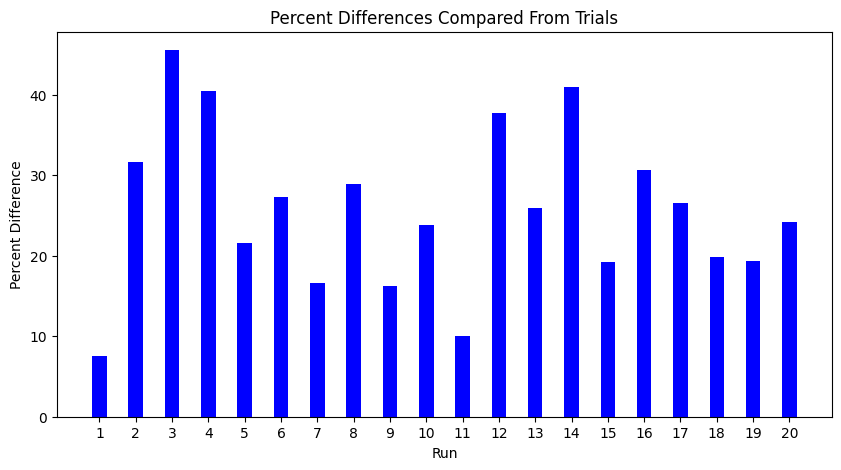

In [ ]:
print("Pheromone Deposit Factor: 0.50")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=30, alpha=1, beta=5, evaporation_rate=0.75, pheromone_deposit_factor=0.50, showGraph=True, showData=False)

print("\n")

print("Pheromone Deposit Factor: 0.75")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=30, alpha=1, beta=5, evaporation_rate=0.75, pheromone_deposit_factor=0.75, showGraph=True, showData=False)

print("\n")

print("Pheromone Deposit Factor: 1.0")
runExperiment(sampleSize=20, cities=25, iterations=50, ant_count=30, alpha=1, beta=5, evaporation_rate=0.75, pheromone_deposit_factor=1.0, showGraph=True, showData=False)

#**Conclusion**

Throughout the course of this project, we delved deep into the realm of optimization algorithms, specifically focusing on the Ant Colony Optimization (ACO) algorithm. By systematically altering various parameters, we aimed to discern their individual and collective impacts on the efficacy of the ACO.

<br>

Our observations underscored a few pivotal points:

 - **Inherent Robustness**: The ACO algorithm's performance, while influenced by the parameters, remained relatively consistent. This speaks volumes about the inherent resilience and adaptability of the algorithm.

- **Pheromone Dynamics**: Our experiments with pheromone evaporation and deposit factors elucidated their critical roles. They play a substantial part in guiding the 'ants' to efficient solutions while ensuring sufficient exploration to avoid local optima.

- **Optimal Parameter Setting**: While there were discernable differences in outcomes based on parameter settings, the project highlighted the challenge of pinpointing an absolute 'best' setting. The optimal configuration is likely problem-specific and may require a balance between exploration (searching new routes) and exploitation (refining known good routes).

- **Need for Further Exploration**: While the experiments provided a wealth of insights, they also hinted at the necessity for more granular investigations, possibly exploring values between the tested parameters or even considering a dynamic adjustment of parameters during the algorithm's run.

<br>

In conclusion, the Ant Colony Optimization algorithm, inspired by nature's own sophisticated methods of problem-solving, proves its mettle as a powerful tool in the realm of optimization. While the journey to fine-tuning its parameters for specific problems is intricate, the rewards in terms of efficiency and solution quality make it a worthy pursuit. This project serves as a stepping stone, encouraging further exploration and adaptation of ACO to a myriad of real-world challenges.
